# Analysis

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
from pathlib import Path
import pandas as pd

In [10]:
N_x = 64

In [11]:
dt = 0.02
T_train = 100  # length of training data
T_test = 25  # length of test data

In [12]:
def load_prediction_data(d_bond, std, rho, seed):
    results = np.load(f'results/prediction_data/{d_bond}_{std}_{rho}_{seed}.npz')

    train_D = results['train_D']
    test_D = results['test_D']
    train_Y = results['train_Y']
    test_Y = results['test_Y']

    return train_D, test_D, train_Y, test_Y

In [13]:
def calculate_valid_time(true_data, predict_data):
    eps = 1
    for n in range(int(T_test/dt)):
        dif = np.sqrt(((true_data[n,:] - predict_data[n,:]) ** 2).mean())
        if dif > eps:
            valid_time = float(n)*dt
            break

    return valid_time

def calculate_RMSE(true_data, predict_data):
    rmse = np.sqrt(np.mean((true_data - predict_data) ** 2))
    return rmse

def filename_parser(filename):
    base = Path(filename).stem
    d_bond, std, rho, seed = base.split('_')
    return d_bond, std, rho, seed

## plot of x,y,z

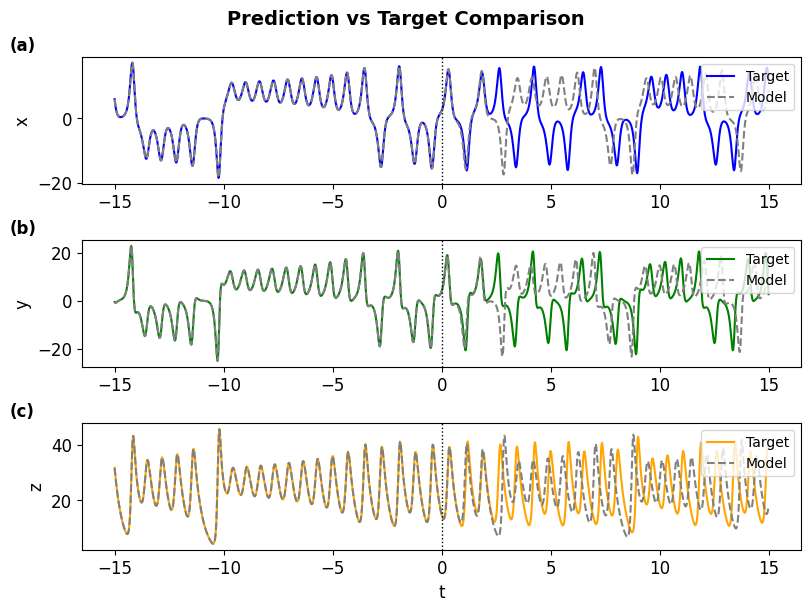

In [19]:
train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=60, std=0.04 , rho=1.0, seed=0)

T_disp = (-15, 15)
t_axis = np.arange(T_disp[0], T_disp[1], dt)
disp_D = np.concatenate((train_D[int(T_disp[0]/dt):],
                        test_D[:int(T_disp[1]/dt)]))  # target output
disp_Y = np.concatenate((train_Y[int(T_disp[0]/dt):],
                        test_Y[:int(T_disp[1]/dt)]))  # model output

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(3, 1, figsize=(8, 6), constrained_layout=True)

labels = ['x', 'y', 'z']
colors = ['blue', 'green', 'orange']
for i, ax in enumerate(axes):
    ax.plot(t_axis, disp_D[:, i], color=colors[i], label='Target', linewidth=1.5)
    ax.plot(t_axis, disp_Y[:, i], color='gray', linestyle='--', label='Model', linewidth=1.5)
    ax.set_ylabel(labels[i])
    ax.axvline(x=0, color='black', linestyle=':', linewidth=1)
    ax.legend(loc='upper right', fontsize=10)
    ax.text(-0.1, 1.05, f'({chr(97+i)})', transform=ax.transAxes, fontsize=12, fontweight='bold')


fig.suptitle('Prediction vs Target Comparison', fontsize=14, fontweight='bold')
axes[-1].set_xlabel('t')

plt.show()


### 3d plot

<Figure size 640x480 with 0 Axes>

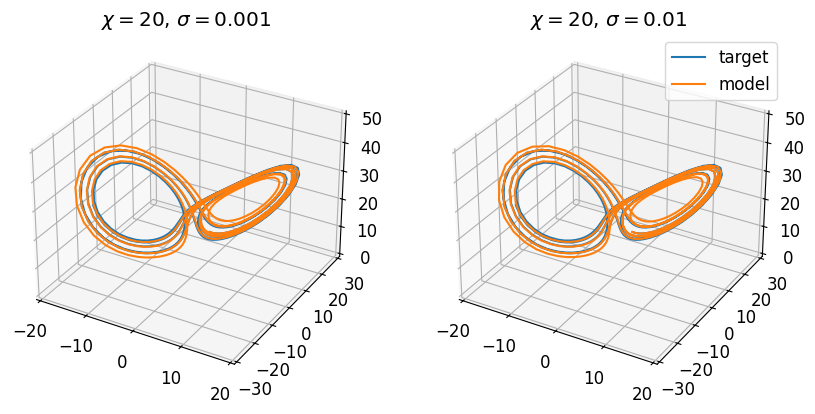

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 5))

ax1.set_xlim((-20, 20))
ax1.set_ylim((-30, 30))
ax1.set_zlim((0, 50))
ax2.set_xlim((-20, 20))
ax2.set_ylim((-30, 30))
ax2.set_zlim((0, 50))

index = 400

d_bond = 20
std = 0.001
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax1.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax1.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax1.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$')

d_bond = 20
std = 0.01
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax2.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax2.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax2.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$')

plt.legend()

<Figure size 640x480 with 0 Axes>

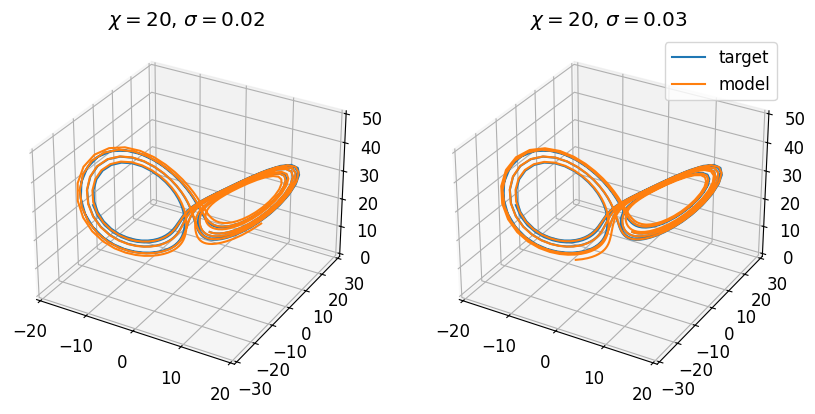

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 5))

ax1.set_xlim((-20, 20))
ax1.set_ylim((-30, 30))
ax1.set_zlim((0, 50))
ax2.set_xlim((-20, 20))
ax2.set_ylim((-30, 30))
ax2.set_zlim((0, 50))

index = 400

d_bond = 20
std = 0.02
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax1.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax1.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax1.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$')

d_bond = 20
std = 0.03
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax2.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax2.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax2.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$')

plt.legend()

<Figure size 640x480 with 0 Axes>

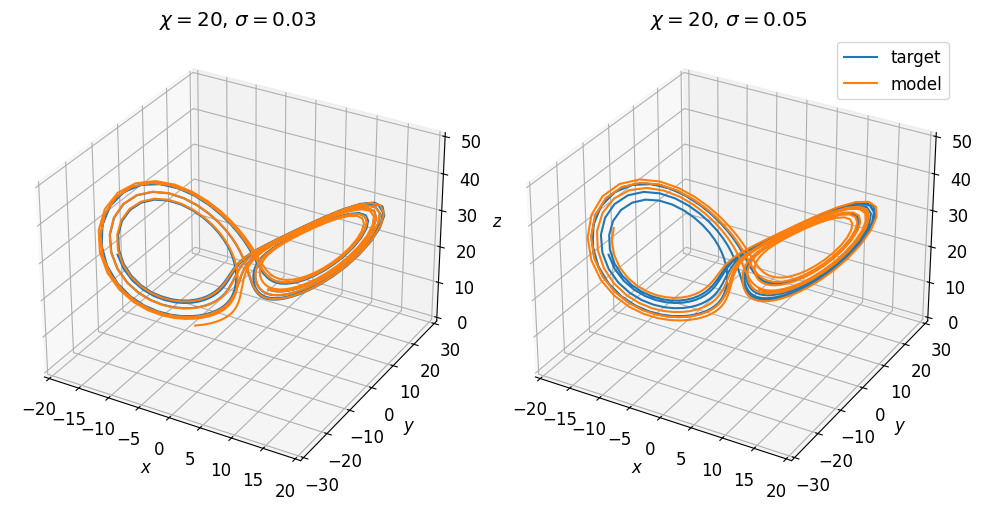

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 5))

ax1.set_xlim((-20, 20))
ax1.set_ylim((-30, 30))
ax1.set_zlim((0, 50))
ax2.set_xlim((-20, 20))
ax2.set_ylim((-30, 30))
ax2.set_zlim((0, 50))

index = 400

d_bond = 20
std = 0.03
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax1.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax1.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax1.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$z$')

d_bond = 20
std = 0.05
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax2.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax2.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax2.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_zlabel(r'$z$')
plt.tight_layout()
plt.legend()

<Figure size 640x480 with 0 Axes>

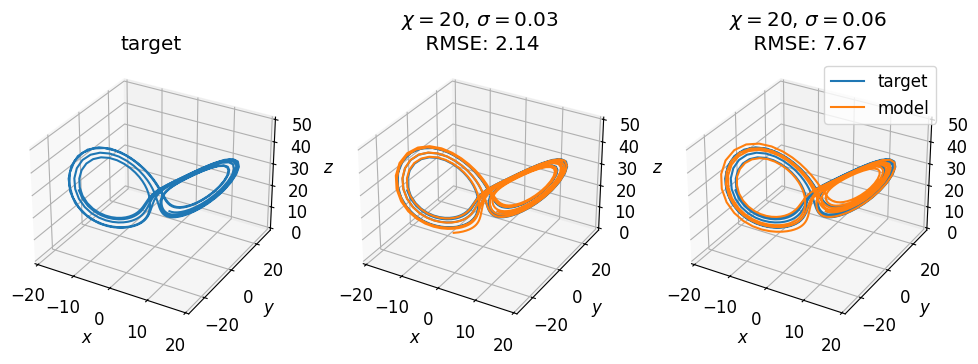

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(12, 5))

ax1.set_xlim((-20, 20))
ax1.set_ylim((-30, 30))
ax1.set_zlim((0, 50))
ax2.set_xlim((-20, 20))
ax2.set_ylim((-30, 30))
ax2.set_zlim((0, 50))
ax3.set_xlim((-20, 20))
ax3.set_ylim((-30, 30))
ax3.set_zlim((0, 50))

index = 400

d_bond = 20
std = 0.03
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax1.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$z$')
# ax1.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax1.set_title(f'target')

d_bond = 20
std = 0.03
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax2.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax2.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax2.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$\n RMSE: {calculate_RMSE(test_D[:index], test_Y[:index]):.2f}')

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_zlabel(r'$z$')


d_bond = 20
std = 0.06
rho = 1.0
seed = 0

train_D, test_D, train_Y, test_Y = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)

ax3.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax3.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax3.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$\n RMSE: {calculate_RMSE(test_D[:index], test_Y[:index]):.2f}')

ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')
ax3.set_zlabel(r'$z$')

plt.legend()
plt.savefig('results/figure/lorenz_attractor.pdf')
plt.savefig('results/figure/figure_supp_9_1_a.pdf', bbox_inches='tight')

### 3d plot animation

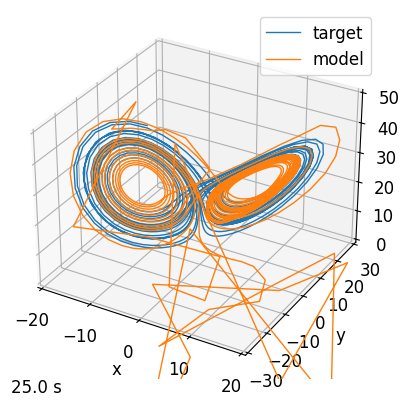

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-20, 20))
ax.set_ylim((-30, 30))
ax.set_zlim((0, 50))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


line, = ax.plot([], [], [], lw=1, label='target')
line2, = ax.plot([], [], [], lw=1, label='model')
time_text = ax.text(0.9, 0.9, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    line2.set_data([], [])
    line.set_3d_properties([])
    line2.set_3d_properties([])
    time_text.set_text('')
    ax.legend()
    return line,

def update(i):
    line.set_data(test_D[:i, 0], test_D[:i, 1])
    line.set_3d_properties(test_D[:i, 2])
    line2.set_data(test_Y[:i, 0], test_Y[:i, 1])
    line2.set_3d_properties(test_Y[:i, 2])
    time_text.set_text(f'{i * dt:.1f} s')
    ax.legend()
    return line,line2

ani = FuncAnimation(fig, update, frames=len(test_D), init_func=init, blit=True)

ani.save('lorenz_attractor.gif', writer='pillow', fps=30)


<Figure size 640x480 with 0 Axes>

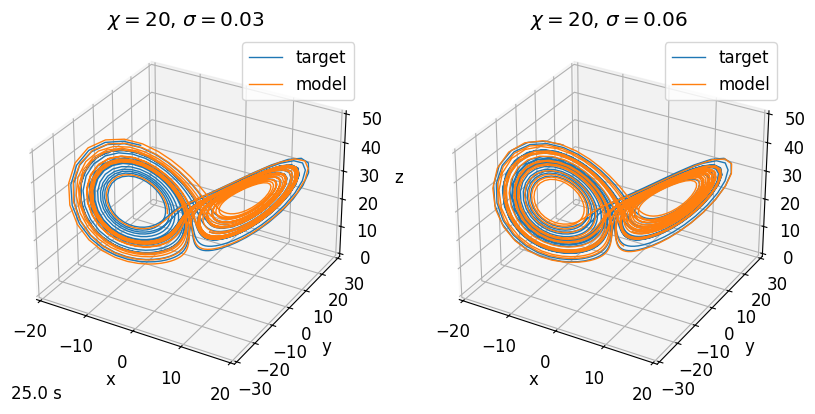

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 5))

ax1.set_xlim((-20, 20))
ax1.set_ylim((-30, 30))
ax1.set_zlim((0, 50))
ax2.set_xlim((-20, 20))
ax2.set_ylim((-30, 30))
ax2.set_zlim((0, 50))

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

d_bond = 20
std = 0.03
rho = 1.0
seed = 0
train_D1, test_D1, train_Y1, test_Y1 = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)
ax1.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$')

d_bond = 20
std = 0.06
train_D2, test_D2, train_Y2, test_Y2 = load_prediction_data(d_bond=d_bond, std=std , rho=rho, seed=seed)
ax2.set_title(f'$\chi = {d_bond}$, $\sigma = {std}$')

target_line1, = ax1.plot([], [], [], lw=1, label='target')
model_line1, = ax1.plot([], [], [], lw=1, label='model')
target_line2, = ax2.plot([], [], [], lw=1, label='target')
model_line2, = ax2.plot([], [], [], lw=1, label='model')
time_text = ax1.text(0.9, 0.9, 0.9, '', transform=ax1.transAxes)

def init():
    target_line1.set_data([], [])
    model_line1.set_data([], [])
    target_line1.set_3d_properties([])
    model_line1.set_3d_properties([])

    target_line2.set_data([], [])
    model_line2.set_data([], [])
    target_line2.set_3d_properties([])
    model_line2.set_3d_properties([])

    time_text.set_text('')
    ax1.legend()
    ax2.legend()
    return target_line1, model_line1, target_line2, model_line2

def update(i):
    target_line1.set_data(test_D1[:i, 0], test_D1[:i, 1])
    target_line1.set_3d_properties(test_D1[:i, 2])
    model_line1.set_data(test_Y1[:i, 0], test_Y1[:i, 1])
    model_line1.set_3d_properties(test_Y1[:i, 2])

    target_line2.set_data(test_D2[:i, 0], test_D2[:i, 1])
    target_line2.set_3d_properties(test_D2[:i, 2])
    model_line2.set_data(test_Y2[:i, 0], test_Y2[:i, 1])
    model_line2.set_3d_properties(test_Y2[:i, 2])

    time_text.set_text(f'{i * dt:.1f} s')
    ax1.legend()
    ax2.legend()
    return target_line1, model_line1, target_line2, model_line2

ani = FuncAnimation(fig, update, frames=len(test_D), init_func=init, blit=True)

ani.save('lorenz_attractor.gif', writer='pillow', fps=30)


## Phase diagram

In [14]:
# load order parameter
save_array = np.load('../order_parameter/results/Order_parameter_64.npz')
X1 = save_array['X']
Y1 = save_array['Y']
MFv64 = save_array['Mfv64']

### RMSE and valid_time

In [15]:
files = glob.glob('results/prediction_data/*.npz')

In [40]:
with open('results/analysis/rmse.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['d_bond', 'std', 'rho', 'seed', 'train_rmse', 'test_rmse', 'valid_time'])
    for file in files:
        results = np.load(file)
        train_D = results['train_D']
        test_D = results['test_D']
        train_Y = results['train_Y']
        test_Y = results['test_Y']

        train_rmse = calculate_RMSE(train_D, train_Y)
        test_rmse = calculate_RMSE(test_D[:400], test_Y[:400])
        valid_time = calculate_valid_time(test_D, test_Y)
        d_bond, std, rho, seed = filename_parser(file)

        writer.writerow([d_bond, std, rho, seed, train_rmse, test_rmse, valid_time])

In [41]:
df = pd.read_csv('results/analysis/rmse.csv')

In [42]:
df

,d_bond,std,rho,seed,train_rmse,test_rmse,valid_time
0,10,0.010,1.0,0,0.000914,5.236837,4.06
1,10,0.020,1.0,0,0.001145,2.060409,5.56
2,10,0.030,1.0,0,0.001298,7.583733,3.98
3,10,0.040,1.0,0,0.001144,7.556523,3.98
4,10,0.050,1.0,0,0.001240,2.134035,5.56
...,...,...,...,...,...,...,...
2415,60,0.001,1.0,9,0.000624,5.022539,4.06
2416,70,0.001,1.0,9,0.000396,4.902253,4.04
2417,80,0.001,1.0,9,0.000430,3.856518,4.16
2418,90,0.001,1.0,9,0.000344,3.984610,4.16


In [43]:
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

In [44]:
df = df[df['std'].isin(stds)]
df

,d_bond,std,rho,seed,train_rmse,test_rmse,valid_time
0,10,0.010,1.0,0,0.000914,5.236837,4.06
1,10,0.020,1.0,0,0.001145,2.060409,5.56
2,10,0.030,1.0,0,0.001298,7.583733,3.98
3,10,0.040,1.0,0,0.001144,7.556523,3.98
4,10,0.050,1.0,0,0.001240,2.134035,5.56
...,...,...,...,...,...,...,...
2415,60,0.001,1.0,9,0.000624,5.022539,4.06
2416,70,0.001,1.0,9,0.000396,4.902253,4.04
2417,80,0.001,1.0,9,0.000430,3.856518,4.16
2418,90,0.001,1.0,9,0.000344,3.984610,4.16


In [45]:
Q1 = df['train_rmse'].quantile(0.25)
Q3 = df['train_rmse'].quantile(0.75)
IQR = Q3 - Q1

df = df[(Q1 - 1.5*IQR < df['train_rmse']) & (df['train_rmse'] < Q3 + 1.5*IQR)]

Q1 = df['test_rmse'].quantile(0.25)
Q3 = df['test_rmse'].quantile(0.75)
IQR = Q3 - Q1
df = df[(Q1 - 1.5*IQR < df['test_rmse']) & (df['test_rmse'] < Q3 + 1.5*IQR)]


mean_results = df.groupby(['d_bond', 'std', 'rho']).mean().reset_index()
mean_results['generalization'] = mean_results['test_rmse'] - mean_results['train_rmse']
mean_results

,d_bond,std,rho,seed,train_rmse,test_rmse,valid_time,generalization
0,10,0.001,1.0,4.5,0.000431,2.743492,5.282,2.743061
1,10,0.010,1.0,4.5,0.000497,2.526005,5.726,2.525508
2,10,0.020,1.0,4.5,0.000559,3.749170,5.392,3.748611
3,10,0.030,1.0,4.5,0.000603,5.054345,4.662,5.053741
4,10,0.040,1.0,4.5,0.000682,4.222569,4.828,4.221887
...,...,...,...,...,...,...,...,...
125,100,0.080,1.0,4.5,10.165726,10.425681,0.000,0.259955
126,100,0.090,1.0,4.5,8.733013,9.154604,0.000,0.421592
127,100,0.100,1.0,4.5,9.536899,9.876386,0.000,0.339488
128,100,0.200,1.0,4.5,9.634546,9.998868,0.000,0.364322


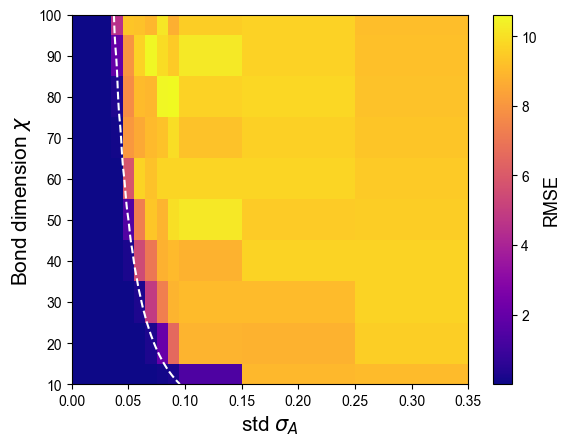

In [ ]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),13))
Y=np.zeros((len(bonds),13))
Z=np.zeros((len(bonds),13))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['train_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)
# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig('results/figure/train_rmse.pdf', bbox_inches='tight')

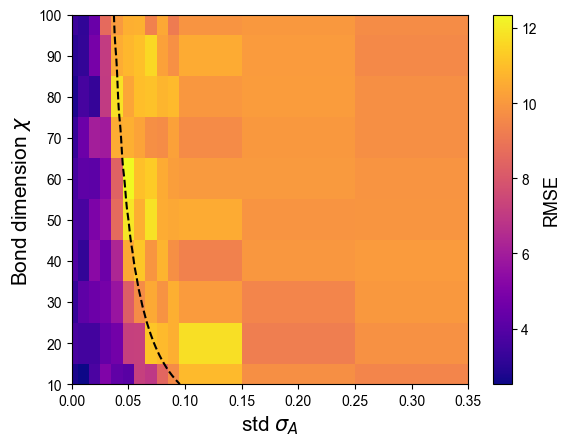

In [ ]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),13))
Y=np.zeros((len(bonds),13))
Z=np.zeros((len(bonds),13))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['test_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='black')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig('results/figure/test_rmse.pdf', bbox_inches='tight')
plt.savefig('results/figure/figure_6_a.pdf')

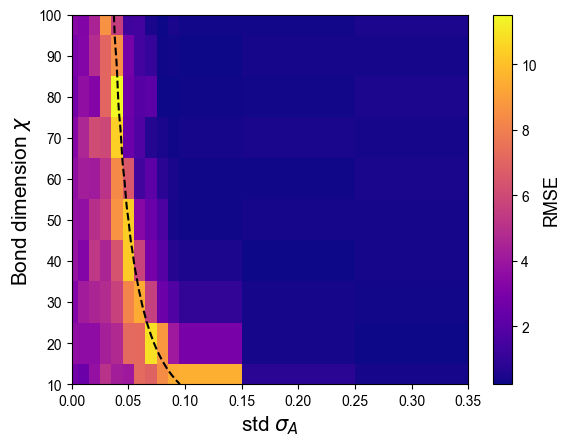

In [48]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),13))
Y=np.zeros((len(bonds),13))
Z=np.zeros((len(bonds),13))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    valid_time = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['generalization']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=valid_time[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='black')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig('results/figure/generalization_rmse.pdf', bbox_inches='tight')

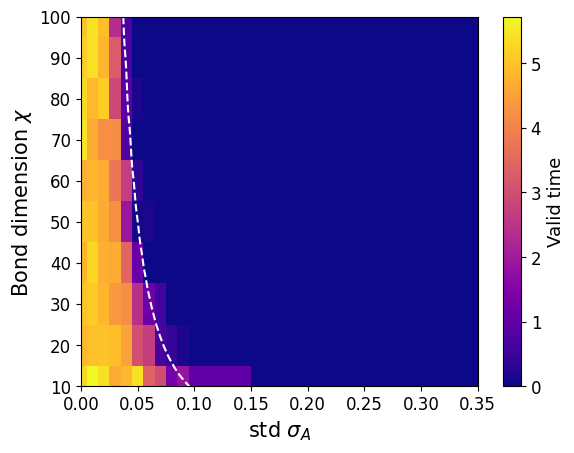

In [45]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),13))
Y=np.zeros((len(bonds),13))
Z=np.zeros((len(bonds),13))
stds=[0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    valid_time = mean_results[(mean_results['d_bond'] == bond) & mean_results['std'].isin(stds)].sort_values('std')['valid_time']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=valid_time[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('Valid time', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig('results/figure/valid_time.pdf', bbox_inches='tight')

## compare with ESN

Compare optimized ESN and optimized MPSRC by Optuna.

In [41]:
index = 400
N_x = 64

with open('results/analysis/rmse_esn.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['seed', 'test_rmse', 'valid_time'])
    for seed in range(10):
        results = np.load(f'results/esn_prediction_data/optimized_esn_{N_x}_{seed}.npz')

        train_D = results['train_D']
        test_D = results['test_D']
        test_Y = results['test_Y']

        test_rmse = calculate_RMSE(test_D[:index], test_Y[:index])
        valid_time = calculate_valid_time(test_D, test_Y)
        writer.writerow([seed, test_rmse, valid_time])

In [42]:
index = 400
N_x = 64

with open('results/analysis/rmse_mps.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['seed', 'test_rmse', 'valid_time'])
    for seed in range(10):
        results = np.load(f'results/esn_prediction_data/optimized_mps_{N_x}_{seed}.npz')

        train_D = results['train_D']
        test_D = results['test_D']
        test_Y = results['test_Y']

        test_rmse = calculate_RMSE(test_D[:index], test_Y[:index])
        valid_time = calculate_valid_time(test_D, test_Y)
        writer.writerow([seed, test_rmse, valid_time])

In [44]:
import pickle
with open(f'results/optuna/best_params_mps_{N_x}.pickle', 'rb') as file:
    result_dict = pickle.load(file)

result_dict

{'std': 0.012679900073903428, 'd_bond': 43}

In [45]:
df_esn = pd.read_csv('results/analysis/rmse_esn.csv')
test_rmse_esn = df_esn['test_rmse']
valid_time_esn = df_esn['valid_time']

In [46]:
df_mps = pd.read_csv('results/analysis/rmse_mps.csv')
test_rmse_mps = df_mps['test_rmse']
valid_time_mps = df_mps['valid_time']

### boxplot

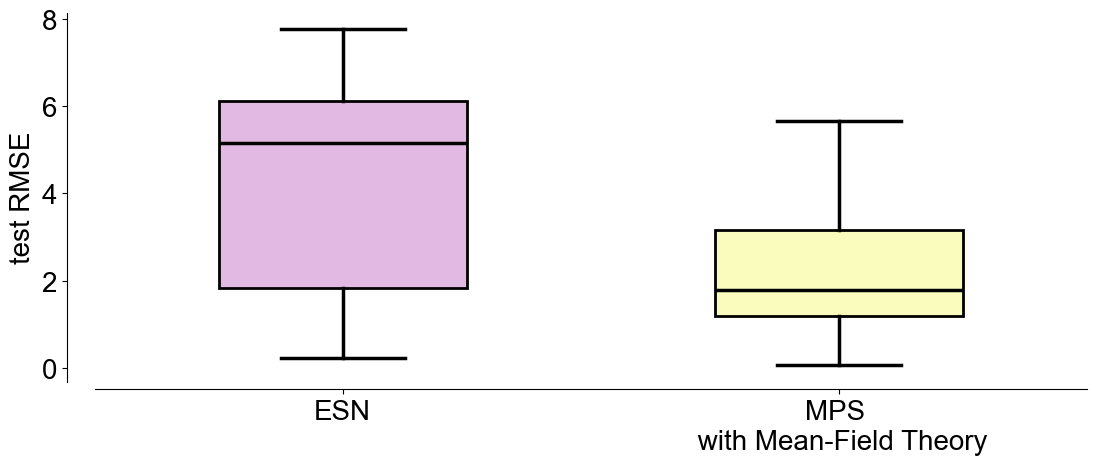

In [ ]:
plt.figure(figsize=(12.8, 4.8))

boxplot_elements = plt.boxplot([test_rmse_esn, test_rmse_mps],
            labels=['ESN', f'MPS \n with Mean-Field Theory'],
            patch_artist=True,
            widths=0.5,
            boxprops={'linewidth': 2.0},
            medianprops={'linewidth': 2.5, 'color': 'black'},
            whiskerprops={'linewidth': 2.5},
            capprops={'linewidth': 2.5})
colors = ['#9c179e4c', '#f1f5254c']
for patch, color in zip(boxplot_elements['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('test RMSE', fontsize=20)

plt.tick_params(labelsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/boxplot-rmse.pdf', bbox_inches='tight')
plt.savefig('results/figure_7_a.pdf', bbox_inches='tight')

### non-parametric test

In [48]:
from scipy.stats import ranksums
stat, p_value = ranksums(test_rmse_esn, test_rmse_mps, alternative='greater')
print(f"Observed statistic: {stat}")
print(f"P-value: {p_value}")

Observed statistic: 1.6630436812405998
P-value: 0.04815184601434413


In [49]:
import numpy as np
from scipy.stats import permutation_test


def statistic(A, B):
    return np.mean(A) - np.mean(B)

result = permutation_test((test_rmse_esn, test_rmse_mps), statistic, alternative='greater', n_resamples=10000, random_state=42)

print(f"Observed statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")


Observed statistic: 2.136213400486335
P-value: 0.029797020297970205


In [50]:
from scipy.stats import ranksums
stat, p_value = ranksums(valid_time_esn, valid_time_mps, alternative='less')
print(f"Observed statistic: {stat}")
print(f"P-value: {p_value}")

Observed statistic: -1.7008401285415227
P-value: 0.04448650585090664


In [51]:
import numpy as np
from scipy.stats import permutation_test


def statistic(A, B):
    return np.mean(A) - np.mean(B)

result = permutation_test((valid_time_esn, valid_time_mps), statistic, alternative='less', n_resamples=10000, random_state=42)

print(f"Observed statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")


Observed statistic: -1.1420000000000003
P-value: 0.0456954304569543


## 3d-plot

In [52]:
df_esn.loc[(df_esn['test_rmse'] - df_esn['test_rmse'].median()).abs().idxmin()]

seed          2.00000
test_rmse     5.10248
valid_time    4.00000
Name: 2, dtype: float64

In [53]:
df_mps.loc[(df_mps['test_rmse'] - df_mps['test_rmse'].median()).abs().idxmin()]

seed          4.000000
test_rmse     1.699261
valid_time    5.560000
Name: 4, dtype: float64

[[ 2.45063174  4.11801076 14.4275939 ]
 [ 2.8111764   4.75632996 13.9066617 ]
 [ 3.23335052  5.51695122 13.48753347]
 ...
 [ 3.96223706  6.29266139 15.23571175]
 [ 4.47207712  7.24251036 14.99890659]
 [ 5.07435898  8.32951856 14.94170635]]
[[ 2.45047979  4.11800892 14.42651603]
 [ 2.81081342  4.75667018 13.90413071]
 [ 3.23282397  5.51781544 13.48374954]
 ...
 [-2.50112222 -4.23865622 13.91694168]
 [-2.8778221  -4.91698903 13.43390359]
 [-3.32102863 -5.72431871 13.05720692]]


<Figure size 640x480 with 0 Axes>

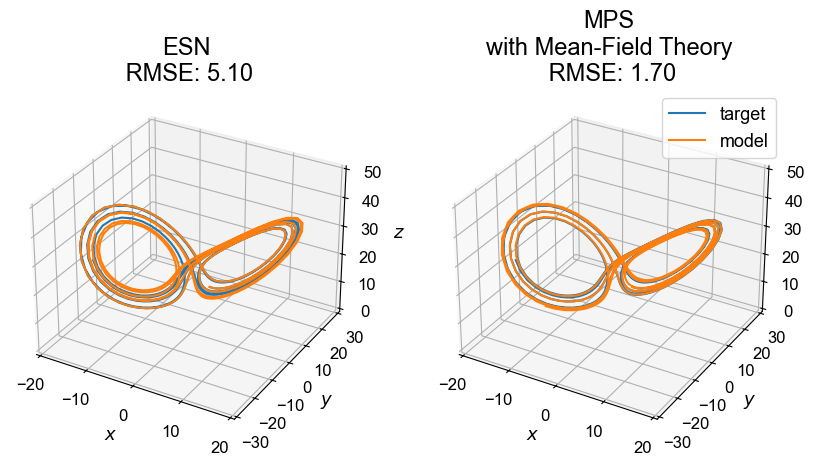

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 5))

ax1.set_xlim((-20, 20))
ax1.set_ylim((-30, 30))
ax1.set_zlim((0, 50))
ax2.set_xlim((-20, 20))
ax2.set_ylim((-30, 30))
ax2.set_zlim((0, 50))

index = 400

seed = 2

results = np.load(f'results/esn_prediction_data/optimized_esn_{N_x}_{seed}.npz')

train_D = results['train_D']
test_D = results['test_D']
test_Y = results['test_Y']
print(test_Y)


ax1.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax1.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax1.set_title(f'ESN\n RMSE: {calculate_RMSE(test_D[:index], test_Y[:index]):.2f}', fontsize=17)

ax1.set_xlabel(r'$x$', fontsize=13)
ax1.set_ylabel(r'$y$', fontsize=13)
ax1.set_zlabel(r'$z$', fontsize=13)

seed = 4

results = np.load(f'results/esn_prediction_data/optimized_mps_{N_x}_{seed}.npz')

train_D = results['train_D']
test_D = results['test_D']
test_Y = results['test_Y']

print(test_Y)

ax2.plot(test_D[:index, 0], test_D[:index, 1], test_D[:index, 2], label='target')
ax2.plot(test_Y[:index, 0], test_Y[:index, 1], test_Y[:index, 2], label='model')
ax2.set_title(f'MPS\nwith Mean-Field Theory\n RMSE: {calculate_RMSE(test_D[:index], test_Y[:index]):.2f}', fontsize=17)

ax2.set_xlabel(r'$x$', fontsize=13)
ax2.set_ylabel(r'$y$', fontsize=13)
ax2.set_zlabel(r'$z$', fontsize=13)



plt.legend(fontsize=13)
plt.savefig('results/figure/3dplot_esn_and_mps.pdf')
plt.savefig('results/figure_7_b.pdf', bbox_inches='tight')